In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Dataset load
customers = pd.read_csv('C:/Users/avina/Downloads/Zeotap_Assignment/Customers.csv')
products = pd.read_csv('C:/Users/avina/Downloads/Zeotap_Assignment/Products.csv')
transactions = pd.read_csv('C:/Users/avina/Downloads/Zeotap_Assignment/Transactions.csv')

In [14]:
#Few rows
print("Customers:")
print(customers.head(), '\n')
print("Products:")
print(products.head(), '\n')
print("Transactions:")
print(transactions.head(), '\n')

Customers:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  20

In [15]:
#Data Inspection
print(customers.info())
print(products.info())
print(transactions.info())

#Check null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

#Summary 
print(transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

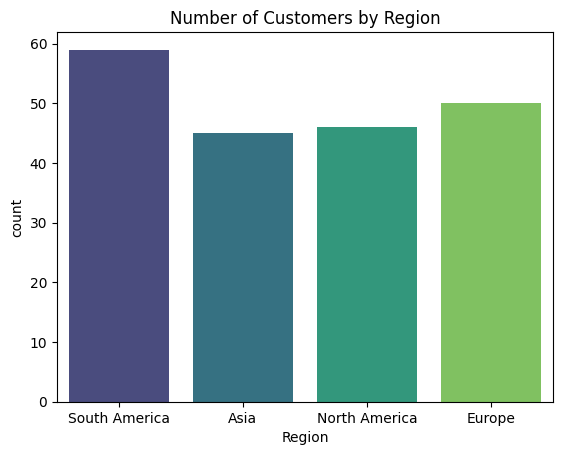

In [16]:
# Visualizations_1
# Signups (By region)
sns.countplot(data=customers, x='Region', hue='Region', palette='viridis', legend=False)
plt.title('Number of Customers by Region')
plt.show()

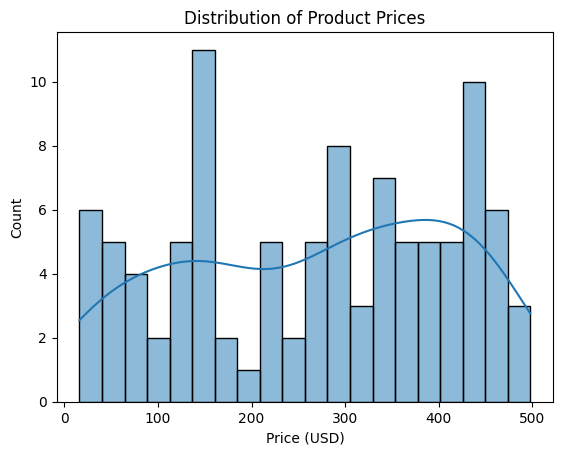

In [17]:
#Visualization_2
#Product prices distribution
sns.histplot(data=products, x='Price', bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.show()

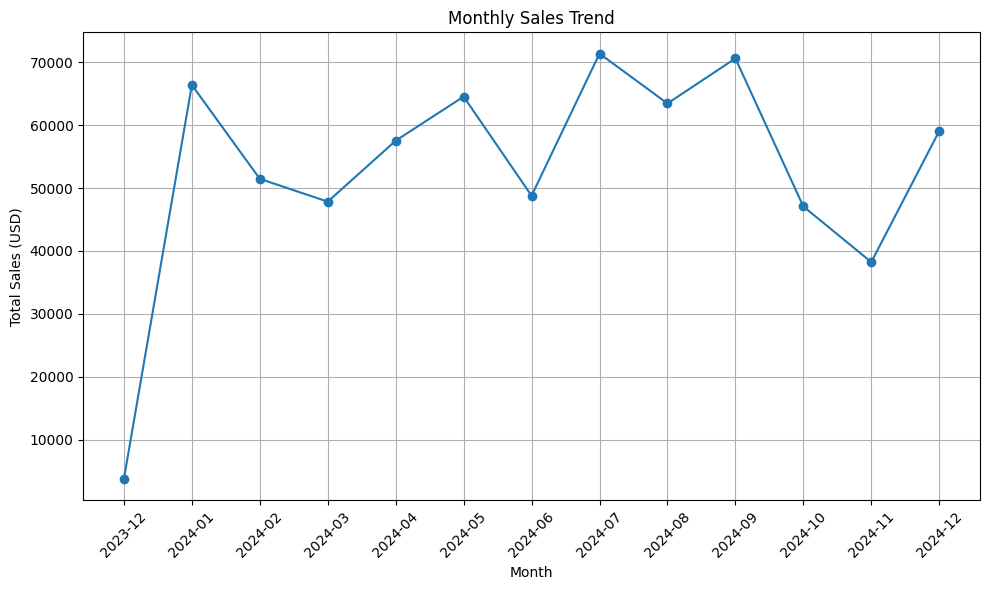

In [18]:
#Visualization_3
#Transactions v/s time

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [19]:
# Prepare data by merging datasets

#MERGING DATASETS

data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

print(data.columns)

#Profile creation of each customer
customer_profiles = data.groupby('CustomerID').agg({
    # Average product price purchased
    'Price_y': 'mean',  
     # Total quantity purchased
    'Quantity': 'sum', 
    # Total spend
    'TotalValue': 'sum'  
}).reset_index()

print(customer_profiles.head())

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Month', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
  CustomerID     Price_y  Quantity  TotalValue
0      C0001  278.334000        12     3354.52
1      C0002  208.920000        10     1862.74
2      C0003  195.707500        14     2725.38
3      C0004  240.636250        23     5354.88
4      C0005  291.603333         7     2034.24
